### Laboratorium 5

Interpolacja

```julia
Pkg.add("Interpolations")
```

In [1]:
using Plots

%config InlineBackend.figure_format = 'svg'

In [11]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
A = [rand() for x in xs]

StepRange{Int64,Int64}Array{Float64,1}

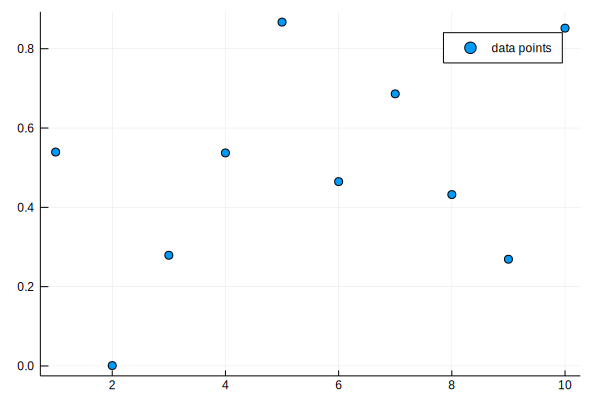

In [3]:
scatter(xs,A, label="data points")

In [4]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

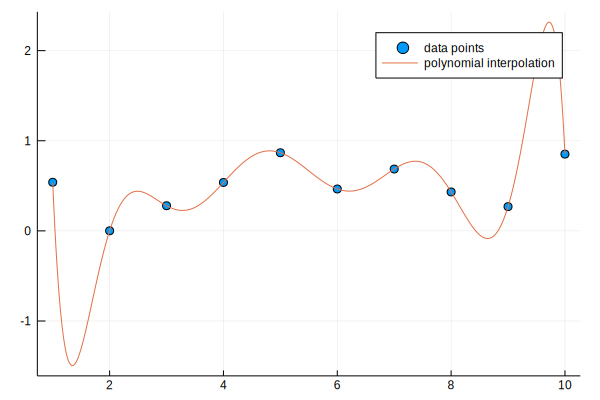

In [5]:
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="polynomial interpolation")

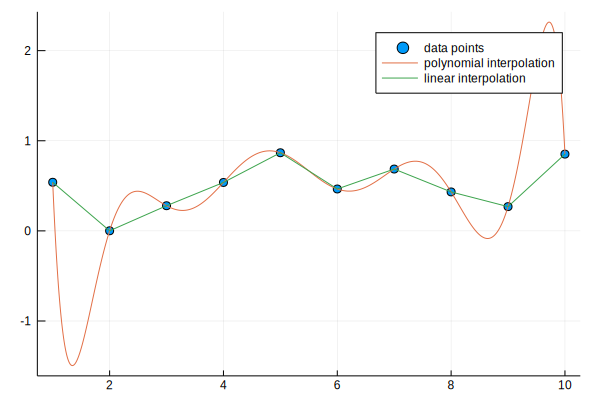

In [6]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, A)
B=[interp_linear(x) for x in xsf]
plot!(xsf,B, label="linear interpolation")

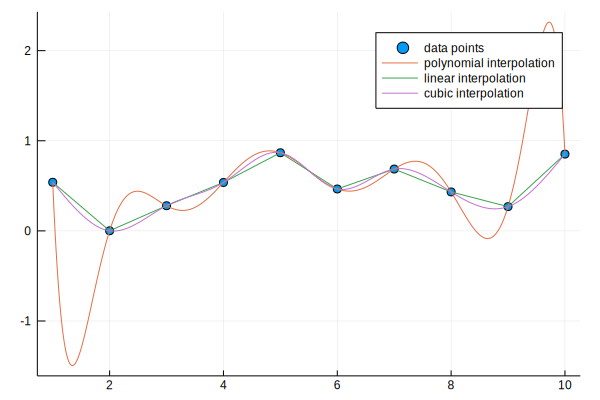

In [7]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

In [8]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Array{Float64,1}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.5394584399666345  
 0.001033989448651948
 0.27918354935115186 
 0.5372572928759192  
 0.8670927500871823  
 0.46490621072966287 
 0.6861779832406523  
 0.4322359578527015  
 0.26916992558306463 
 0.8519014148719274  

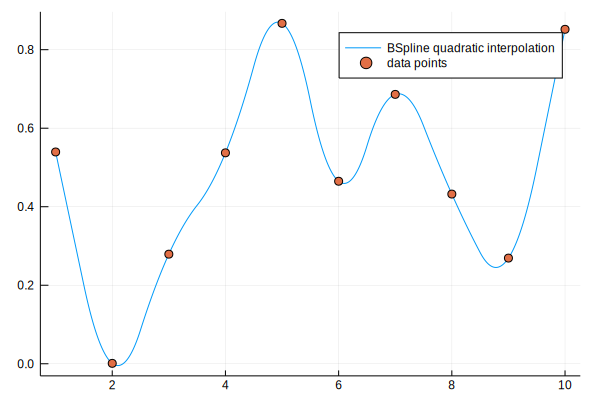

In [9]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation")
scatter!(xs,A, label="data points")

### Zadania
- Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation.pdf"> wielomian interpolacyjny  Lagrange'a </a>. Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

- Zrobic to samo dla metody <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation.pdf"> Newtona (metoda ilorazów róznicowych)</a>. Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

- Zastosowac interpolację wielomianową z pakietu Polynomials (jesli wybralismy Julie) albo z 
funkcji <i> gsl_interp_polynomial</i> z pakietu <a href="https://www.gnu.org/software/gsl/doc/html/interp.html#">GSL</a> (jesli wybraliśmy C) do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

- Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Narzedzie do analizy danych do wyboru (Julia, R)

- Poeksperymentowac z  interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane),  narysowac wykresy i porownac z wykresami interpolacji wielomianowej. 

- Zademonstrowac  efekt Rungego. 

- Zbadać i zademonstrować podczas zajęc rózne algorytmy interpolacji stosowane w grafice komputerowej (np. do zmiany wielkości obrazu). Można korzystac z gotowych rozwiazań, ale trzeba wiedzieć, jak te algorytmy dzialaja. Do zaliczenia tego zadania potrzebne jest demonstracja i porownanie działania conajmniej dwóch metod.

LoadError: syntax: incomplete: "function" at none:1 requires end

newton (generic function with 9 methods)

In [74]:
using DataFrames
using Plots
df = DataFrame([1.0:0.01:10.0, InterpolateLagrange([1,2,3,4,5,6,7,8,9,10], [8,2,4,7,4,9,2,1,7,4], 1.0:0.01:10.0), newton([1,2,3,4,5,6,7,8,9,10], [8,2,4,7,4,9,2,1,7,4]), 1.0:0.01:10.0], [:X, :Y, :Y2])
plot(df[:X], df[:Y])
plot!(df[:X], df[:Y2])

MethodError: MethodError: no method matching -(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Int64)
Closest candidates are:
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:298
  -(!Matched::Missing, ::Number) at missing.jl:93
  -(!Matched::Base.CoreLogging.LogLevel, ::Integer) at logging.jl:107
  ...